# Antecipação de Churn Bancário com Aprendizado de Máquina e Técnicas de Balanceamento

### Desenvolvido por: Fernanda Paula Rocha


## Introdução

Com a crescente competição no setor bancário, a retenção de clientes torna-se uma prioridade estratégica para as instituições financeiras. A perda de clientes, conhecida como churn, pode ser prejudicial para a estabilidade e o crescimento do banco. Nesse contexto, a aplicação de técnicas avançadas de análise de dados e aprendizado de máquina surge como uma ferramenta valiosa para identificar clientes em risco de deixar o banco antes que isso aconteça. Este projeto visa explorar a previsão de churn bancário, utilizando um conjunto de dados abrangente que inclui uma variedade de atributos relacionados aos clientes. 

Para alcançar esse objetivo, é empregado uma abordagem abrangente utilizando cinco modelos de aprendizado de máquina amplamente reconhecidos. Cada modelo foi escolhido com base em suas características específicas e na capacidade de lidar com diferentes nuances dos dados. Os modelos selecionados para este estudo são:

1. **Decision Tree Classifier:**
   - **Justificativa:** Este modelo é escolhido por sua capacidade de mapear relações complexas nos dados. As árvores de decisão são eficazes na identificação de padrões não lineares, tornando-as valiosas para problemas de churn que podem envolver interações não triviais entre variáveis.


2. **Gaussian Naive Bayes:**
   - **Justificativa:** O Naive Bayes é particularmente eficaz quando há independência condicional entre os atributos. A simplicidade do modelo e sua eficiência na manipulação de dados de alta dimensionalidade fazem dele uma escolha adequada para a previsão de churn, onde a interação entre diferentes variáveis pode ser complexa.


3. **HistGradient Boosting Classifier:**
   - **Justificativa:**  é uma variação otimizada do algoritmo de Gradient Boosting. A principal diferença está na maneira como as árvores de decisão são construídas. Utilizando um método chamado "histogram-based learning", em vez de usar os valores brutos dos atributos para construir as árvores,  utiliza histogramas para discretizar os dados. Isso resulta em uma representação mais eficiente e permite treinamento mais rápido.

4. **Logistic Regression:**
   - **Justificativa:** A Regressão Logística é uma escolha clássica para problemas de classificação binária. Sua interpretabilidade e eficácia na modelagem de relações lineares entre variáveis são vantagens importantes, permitindo uma análise mais fácil das variáveis de impacto no churn.


5. **Random Forest Classifier:**
   - **Justificativa:** A Random Forest é uma extensão das árvores de decisão que utiliza várias árvores para realizar a classificação. A capacidade de lidar com sobreajuste e a robustez em dados não lineares tornam-na uma escolha sólida para problemas de churn.


Além disso, considerando que o conjunto de dados apresenta desequilíbrio entre as classes da variável alvo, é aplicado quatro técnicas de *oversampling* para balanceamento:

- **Desbalanceado:** Conjunto de dados original.

- **SMOTE (Synthetic Minority Over-sampling Technique):** Gera exemplos sintéticos da classe minoritária para equilibrar as classes.

- **ADASYN (Adaptive Synthetic Sampling):** Similar ao SMOTE, mas com uma abordagem adaptativa, gerando mais exemplos próximos aos pontos de fronteira.

- **SMOTETomek:** Combinação de SMOTE com remoção de exemplos Tomek, visando equilibrar as classes e remover ambiguidades na fronteira de decisão.

Essa abordagem envolve o aumento da representação da classe minoritária, gerando instâncias sintéticas ou replicando amostras existentes. A inclusão dessas técnicas visa avaliar a influência do desequilíbrio de classes nos resultados dos modelos, proporcionando *insights* valiosos sobre a eficácia dessas abordagens no contexto específico de previsão de churn bancário.


## Conjunto de dados

O conjunto de dados utilizado é composto pelas seguintes variáveis:

1. **``Rownumber``:** Identificação única para cada linha.
2. **``CustomerID``:** Identificação única para cada cliente.
3. **``Surname``:** Sobrenome do cliente.
4. **``CreditScore``:** Pontuação de crédito do cliente.
5. **``Geography``:** País de origem do cliente.
6. **``Gender``:** Gênero do cliente.
7. **``Age``:** Idade do cliente.
8. **``Tenure``:** Número de anos que o cliente está relacionado ao banco.
9. **``Balance``:** Saldo na conta do cliente.
10. **``NumOfProducts``:** Número de produtos do cliente.
11. **``HasCrCard``:** Sinalizador indicando se o cliente possui cartão de crédito ou não.
12. **``IsActiveMember``:** Sinalizador indicando se o cliente é membro ativo do banco.
13. **``EstimatedSalary``:** Salário anual estimado do cliente em euros.
14. **``Exited``:** Variável-alvo, sinalizador indicando se o cliente deixou o banco (1) ou não (0).



## Objetivo

O objetivo principal deste projeto é desenvolver modelos de aprendizado de máquina capazes de prever se um cliente é propenso a deixar o banco, utilizando como variável-alvo a informação disponível na coluna ``Exited``. Ao antecipar o churn, pretende-se fornecer ao banco insights valiosos que podem orientar a implementação de estratégias proativas para retenção de clientes. A aplicação eficaz desses modelos pode resultar em intervenções direcionadas, personalizadas e oportunas, contribuindo para a redução do churn e fortalecendo a relação banco-cliente.



# ------------------------------------------------------------------
# Carregamento e Exploração Inicial dos Dados
# ------------------------------------------------------------------

In [31]:
# --------------------------------------------------------------
# Importação de Bibliotecas
# -------------------------------------------------------------- 


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

from sklearn.metrics import roc_auc_score, auc, accuracy_score, precision_score, recall_score, f1_score,roc_curve, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from sklearn.model_selection import StratifiedKFold


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Versões das bibliotecas utilizadas:
# Pandas: 1.4.2
# NumPy: 1.22.3
# Matplotlib: 3.4.3
# Seaborn: 0.12.1
# Sklearn: 1.1.3

In [36]:
print("Versões das bibliotecas utilizadas:")
print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)
print("Matplotlib:", plt.matplotlib.__version__)
print("Seaborn:", sns.__version__)
print("Sklearn:", sklearn.__version__)



Versões das bibliotecas utilizadas:
Pandas: 1.4.2
NumPy: 1.22.3
Matplotlib: 3.4.3
Seaborn: 0.12.1
Sklearn: 1.1.3


In [3]:
df = pd.read_csv(r'data/Churn_Modelling.csv', encoding="utf-8", header=0, delimiter= ",")
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
for i in df.columns:
    print(f'\033[1m{i}\033[0m possui \033[1m{df[i].nunique()}\033[0m valores únicos')

RowNumber possui 10000 valores únicos
CustomerId possui 10000 valores únicos
Surname possui 2932 valores únicos
CreditScore possui 460 valores únicos
Geography possui 3 valores únicos
Gender possui 2 valores únicos
Age possui 70 valores únicos
Tenure possui 11 valores únicos
Balance possui 6382 valores únicos
NumOfProducts possui 4 valores únicos
HasCrCard possui 2 valores únicos
IsActiveMember possui 2 valores únicos
EstimatedSalary possui 9999 valores únicos
Exited possui 2 valores únicos


In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df['Tenure'] = df['Tenure'].astype(str)
df['HasCrCard'] = df['HasCrCard'].astype(str)
df['Exited'] = df['Exited'].astype(str)
df['NumOfProducts'] = df['NumOfProducts'].astype(str)
df['IsActiveMember'] = df['IsActiveMember'].astype(str)

In [11]:
#Checking if the type of variables changed to object or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  object 
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  object 
 7   HasCrCard        10000 non-null  object 
 8   IsActiveMember   10000 non-null  object 
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 859.5+ KB


###  Variáveis categóricas em relação a saída dos clientes

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


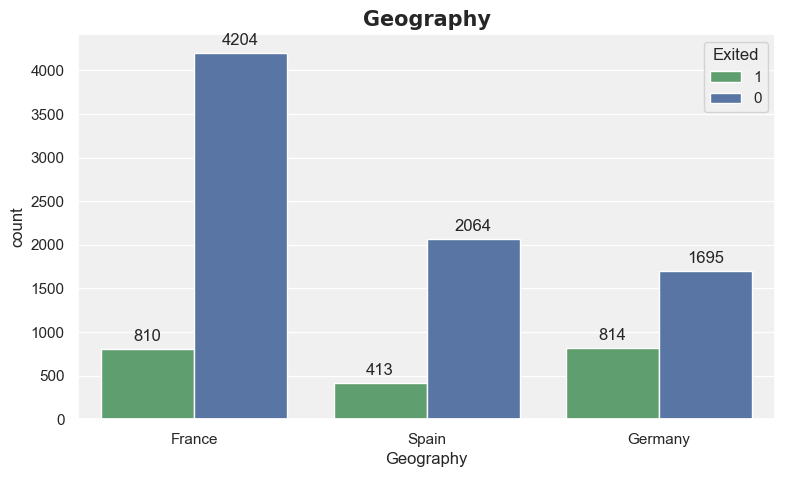

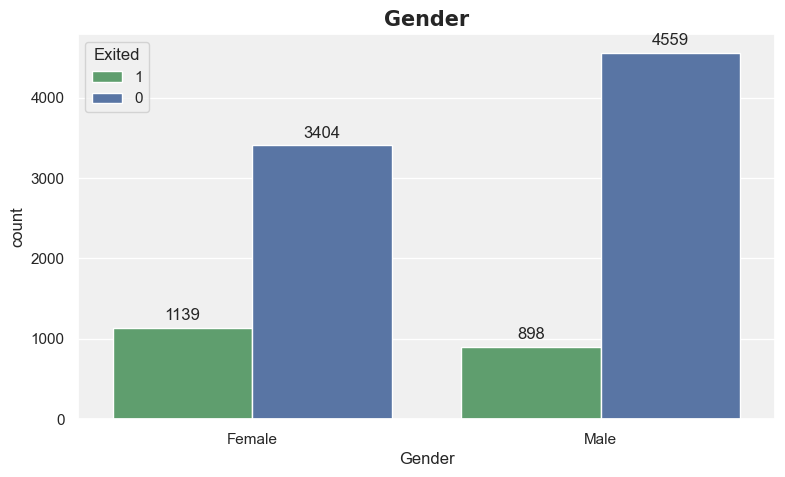

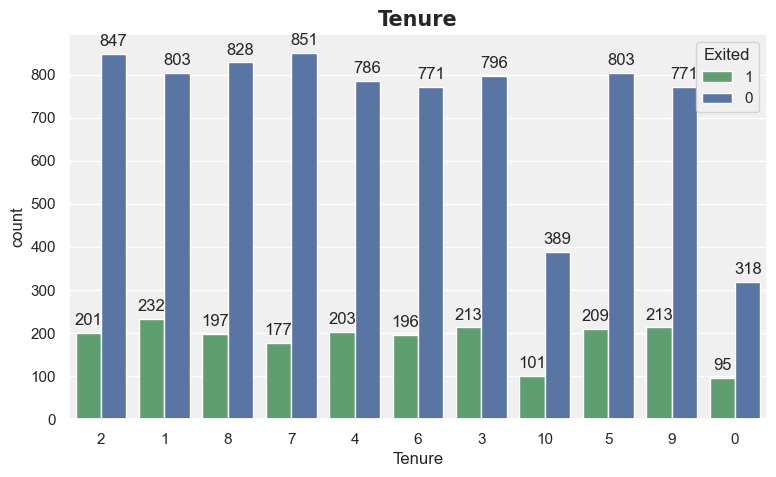

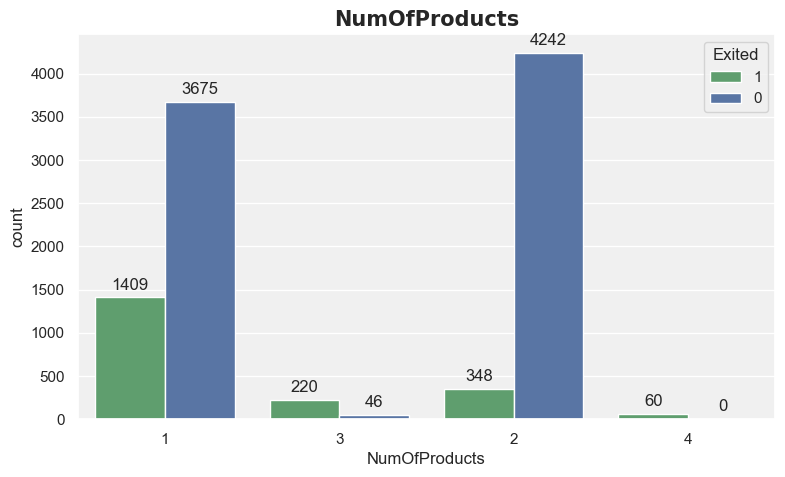

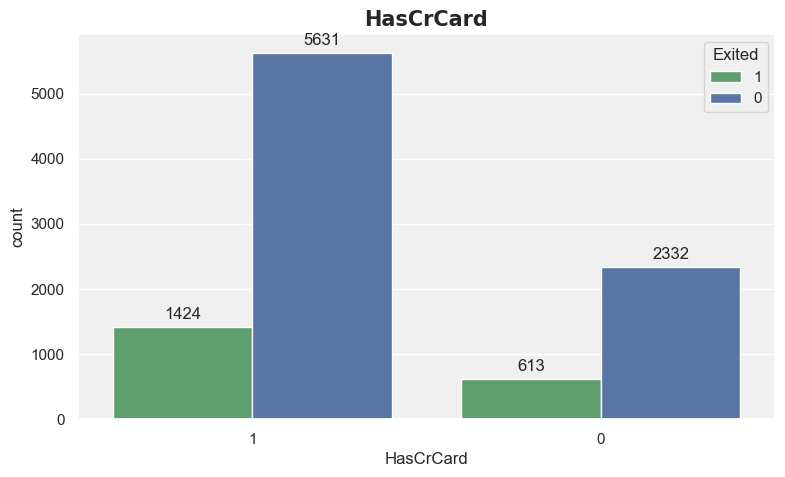

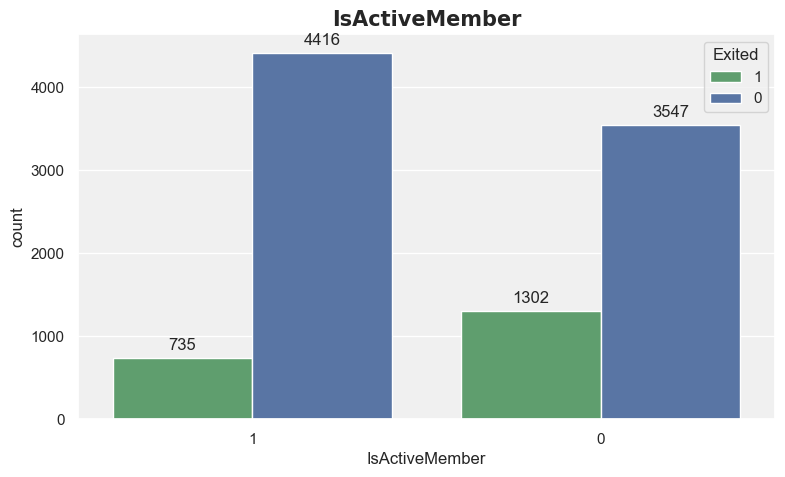

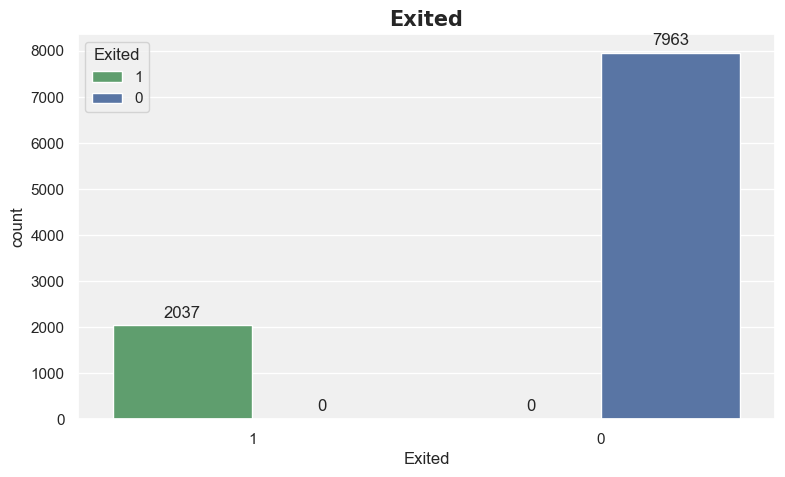

In [12]:
list_of_cat_features = df.select_dtypes(include=['object', 'category'])
palette_features = ['#55A868', '#4C72B0']  
sns.set(rc={'axes.facecolor':'#F0F0F0'}) 

for feature in list_of_cat_features:
    plt.figure(figsize=(9,5)) 
    plt.title(feature, fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
    ax = sns.countplot(data=df, x=feature, hue='Exited', palette=palette_features)
    

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    
    plt.show()

**Análise dos Resultados**

1. **Diferença nos Países:**
   - A Alemanha apresenta a maior taxa de churn, apesar de possuir uma quantidade menor de clientes em comparação com a França e a Espanha. Esse fenômeno sugere a necessidade de uma análise mais aprofundada para compreender os fatores específicos relacionados à Alemanha que podem contribuir para uma maior propensão ao churn.


2. **Gênero e Churn:**
   - A observação de que clientes do sexo feminino têm uma taxa de churn mais elevada sugere a existência de dinâmicas específicas relacionadas a esse grupo. Pode ser interessante explorar aspectos como experiência do cliente, serviços oferecidos ou campanhas de fidelização direcionadas a diferentes gêneros.


3. **Relação entre Tempo como Cliente e Churn:**
   - O padrão de menor churn no primeiro ano sugere que a retenção inicial de clientes é crucial. Isso pode indicar que estratégias de engajamento e retenção devem ser especialmente focadas nos primeiros meses após a aquisição de clientes.


4. **Número de Produtos e Churn:**
   - A relação inversa entre o número de produtos e a propensão ao churn destaca a importância de promover a adoção de múltiplos produtos entre os clientes. Clientes com mais produtos parecem estar mais vinculados ao banco, sugerindo que estratégias que podem ser eficazes na redução do churn.


5. **Posse de Cartão de Crédito e Churn:**
   - A associação entre a posse de cartão de crédito e uma maior taxa de churn pode indicar que os clientes com cartões de crédito estão insatisfeitos com os serviços ou podem ser mais suscetíveis a ofertas concorrentes. Investigações adicionais sobre a experiência do cliente com serviços de cartão de crédito podem ser úteis.


6. **Atividade do Cliente e Churn:**
   - A relação entre a inatividade do cliente e uma maior taxa de churn destaca a importância de estratégias de engajamento proativo. Clientes ativos parecem ter uma menor propensão ao churn, indicando que recompensas ou benefícios para membros ativos podem ser estratégias eficazes.


**Visão Geral dos Resultados:**
   - Com uma taxa geral de churn de 20%, foi identificado áreas específicas, como o mercado alemão e clientes femininos, que demandam atenção especial. Estratégias de fidelização, personalização de serviços e análise contínua da experiência do cliente podem ser cruciais para mitigar o churn.
   
**Observação:** Note que há desiquilíbrio na variável alvo ``Exited``. 

A proporção de desequilíbrio pode ser calculada dividindo o número de instâncias da classe minoritária (churn) pelo número total de instâncias. Calculando:

$ \text{Proporção de Desequilíbrio} = \frac{\text{Número de Churn}}{\text{Número Total de Clientes}}$


Substituindo com os dados fornecidos:

$\text{Proporção de Desequilíbrio} = \frac{2037}{7963}$

Agora, vamos calcular esse valor.

$\text{Proporção de Desequilíbrio} = \frac{2037}{7963} \approx 0.2557$

A proporção de desequilíbrio da variável ``Exited`` é aproximadamente \(0.2557\) ou \(25.57\%\). Isso significa que a classe minoritária (clientes que deixaram o banco) representa cerca de \(25.57\%\) do total de clientes, indicando um desequilíbrio moderado na distribuição dessa variável. O desequilíbrio pode ter implicações nas análises e modelagem, especialmente ao lidar com algoritmos de aprendizado de máquina que podem ser sensíveis a desequilíbrios nas classes. Por isso, será utilziado algumas técnicas para lidar com esse problema que talvez possa afetar o desempenho dos modelos. 



### Distribuição de colunas numéricas

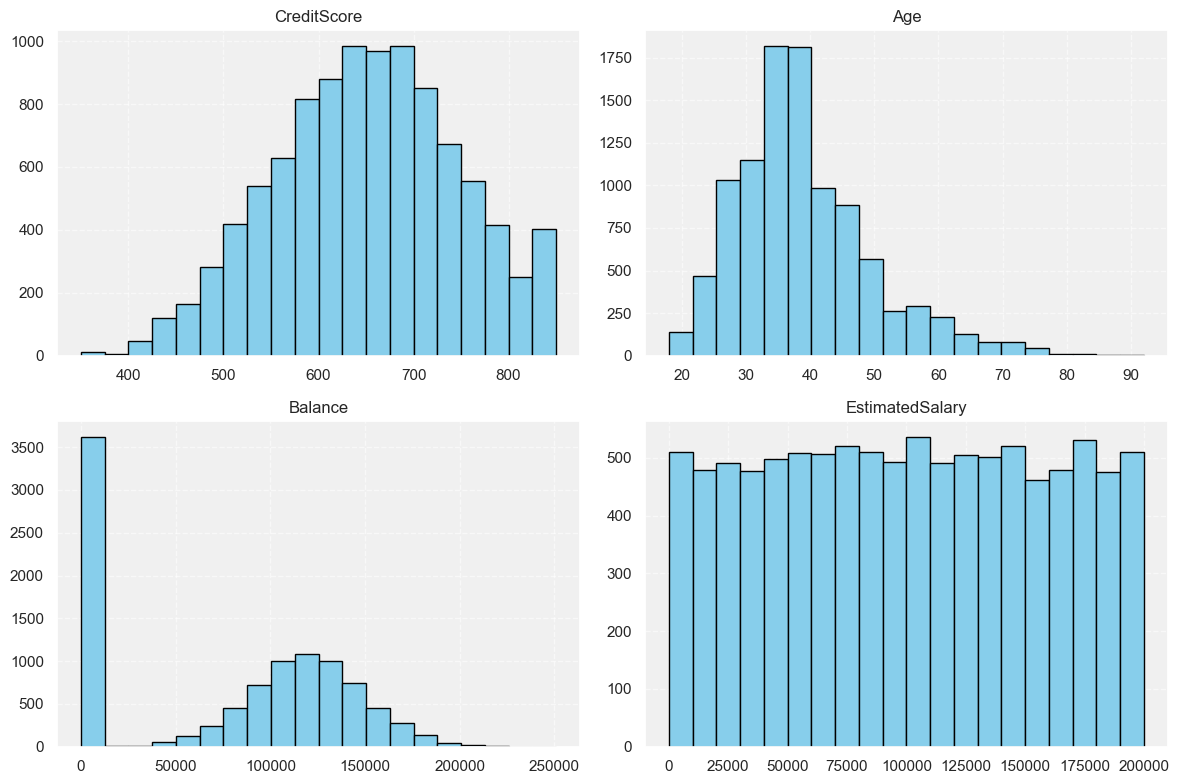

In [13]:
numeric_columns = df.select_dtypes(include=['number'])

fig, axes = plt.subplots(nrows=len(numeric_columns.columns)//2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)


axes = axes.flatten()

for i, col in enumerate(numeric_columns.columns):
    ax = axes[i]
    ax.hist(numeric_columns[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

**Análise da Distribuição**

1. **Pontuação de Crédito:**
   - **Análise:** A observação de que esssa variável possa ter uma distribuição normal na pontuação de crédito, com picos mais elevados em 600 e 700, sugere que a maioria dos clientes possui pontuações de crédito concentradas nessas faixas. Isso  implica que a maioria dos clientes possui pontuações próximas à média, e há menos clientes com pontuações extremas. O que também indica que os clientes têm um histórico de pagamento consistente, gerenciamento responsável de crédito e menor risco percebido pelos credores. Mas a existência de picos específicos pode ser influenciada por políticas internas do banco relacionadas à atribuição de pontuações de crédito.

2. **Idade:**
   - **Análise:** A observação de que a idade dos clientes pode se aproximar de uma distribuição normal, com uma maioria nas faixas de 30 e 40 anos, sugere uma distribuição relativamente equilibrada da idade. Esse padrão pode ser resultado da inclusão de uma ampla gama de faixas etárias na base de clientes. A presença de uma distribuição normal pode indicar que o banco atrai clientes de diferentes faixas etárias de maneira equitativa.

3. **Saldo da Conta:**
   - **Análise:** A constatação de que o saldo da conta possui um número significativamente menor, em comparação com outros atributos, destaca a possível variação considerável nos saldos das contas dos clientes. Essa variação pode ser atribuída a diferentes perfis financeiros entre os clientes, alguns mantendo saldos mais altos, enquanto outros mantêm saldos mais baixos. A identificação desses perfis pode ser crucial para personalizar ofertas e serviços bancários.

4. **Salários Anuais:**
   - **Análise:** A constatação de que o salário anual dos clientes varia de pouco mais de 10.000 euros a 20.000 euros, com quase a mesma quantidade de clientes em cada faixa salarial, indica uma distribuição relativamente equitativa. Essa distribuição equitativa pode refletir uma clientela diversificada em termos de renda. O banco pode estar atendendo a diferentes segmentos econômicos, o que destaca a importância de estratégias de produtos e serviços que atendam a uma ampla gama de capacidades financeiras.

**Visão Geral dos Resultados:**
- A distribuição normal da idade sugere uma base de clientes diversificada em termos de faixa etária, enquanto a variação nos saldos das contas e salários anuais destaca a importância de compreender as diferentes situações financeiras dos clientes. Essas observações indicam a necessidade de personalização nas abordagens de atendimento ao cliente e na oferta de produtos e serviços. Estratégias que reconhecem e respondem às diferentes características financeiras dos clientes podem fortalecer a fidelidade e a satisfação.

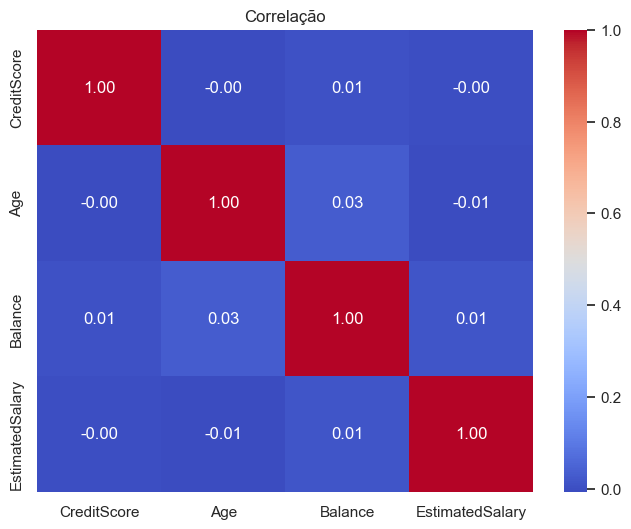

In [14]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação")
plt.show()

1. **CreditScore com Age:**
   - A correlação muito próxima de zero (-0.003965) entre a pontuação de crédito e a idade sugere uma relação praticamente inexistente entre essas variáveis. Não há uma tendência clara de mudança em uma variável que possa ser explicada pela mudança na outra.

3. **CreditScore com Balance:**
   - A correlação positiva muito próxima de zero (0.006268) entre a pontuação de crédito e o saldo da conta indica uma relação muito fraca entre essas variáveis. Não há uma associação clara entre a pontuação de crédito e o saldo da conta com base nessa correlação.

4. **CreditScore com EstimatedSalary:**
   - A correlação muito próxima de zero (-0.001384) entre a pontuação de crédito e o salário estimado sugere uma relação insignificante entre essas variáveis. Não há uma associação clara entre a pontuação de crédito e o salário estimado com base nessa correlação.

A matriz de correlação fornece insights sobre a força e a direção das relações lineares entre as variáveis. No caso, não parece haver fortes associações lineares entre as variáveis, com correlações muito próximas de zero.

# --------------------------------------------------------------
# Pré-processamento de Dados
# --------------------------------------------------------------

### Encoding

Codificação one-hot das variáveis categóricas ``Geography`` e ``Gender``. 

Será utilizado o parâmetro drop='first' no OneHotEncoder, para remover a primeira categoria de cada variável categórica. No caso de "Geography", a primeira categoria é ‘France’, e para "Gender", a primeira categoria é "Female". A ideia por trás disso é evitar a multicolinearidade (ou seja, variáveis altamente correlacionadas) em seu conjunto de dados, o que pode ser problemático para alguns modelos de aprendizado de máquina.

In [15]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [17]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [18]:
categorical_columns = df[['Geography', 'Gender']]

# Inicializando OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Ajustando e tranformando os dados categóricos
encoded_data = encoder.fit_transform(categorical_columns)

# Obtendo os nomes das características com base nas categorias do codificador
categories = encoder.categories_
feature_names = [f"{col}_{val}" for col, values in zip(categorical_columns.columns, categories) for val in values[1:]]

# Convertendo os dados codificados para um DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

# Convertendo os valores codificados para inteiros
encoded_df = encoded_df.astype(int)
encoded_df = encoded_df.astype(str)

# Concatenando o DataFrame codificado com o DataFrame original
df = pd.concat([df, encoded_df], axis=1)

# Removendo as colunas categóricas originais do DataFrame
df = df.drop(['Geography', 'Gender'], axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  object 
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  object 
 5   HasCrCard          10000 non-null  object 
 6   IsActiveMember     10000 non-null  object 
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  object 
 9   Geography_Germany  10000 non-null  object 
 10  Geography_Spain    10000 non-null  object 
 11  Gender_Male        10000 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 937.6+ KB


In [20]:
df['Tenure'] = df['Tenure'].astype(int)
df['HasCrCard'] = df['HasCrCard'].astype(int)
df['Exited'] = df['Exited'].astype(int)
df['NumOfProducts'] = df['NumOfProducts'].astype(int)
df['IsActiveMember'] = df['IsActiveMember'].astype(int)
df['Gender_Male'] = df['Gender_Male'].astype(int)


# --------------------------------------------------------------
# Aplicação dos algoritmos e técnicas de balanceamento
# --------------------------------------------------------------

**Observação:** Não serão inclusas no modelo as variáveis  'Geography_Germany', 'Geography_Spain' porque aumenta a multicolineariedade e o desempenho dos modelos diminuem. 

In [21]:
X = df.drop(columns=['Exited', 'Geography_Germany', 'Geography_Spain'])
y = df['Exited']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3, random_state = 42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7000, 9), (3000, 9), (7000,), (3000,))

In [23]:
# SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# ADASYN
adasyn = ADASYN()
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# SMOTETomek
smoteTomek = SMOTETomek()
X_train_smoteTomek, y_train_smoteTomek = smoteTomek.fit_resample(X_train, y_train)

### Modelos treinados usando as técnicas SMOTE, ADASYN e DBSMOTE além do desbalanceado

In [24]:
balance_techniques = [('Desbalanceado', X_train.to_numpy(), y_train.to_numpy()),
                      ('SMOTE', X_train_smote.to_numpy(), y_train_smote.to_numpy()),
                      ('ADASYN', X_train_adasyn.to_numpy(), y_train_adasyn.to_numpy()),
                      ('SMOTETomek', X_train_smoteTomek.to_numpy(), y_train_smoteTomek.to_numpy())]


classifiers = [DecisionTreeClassifier(),
               GaussianNB(),
               HistGradientBoostingClassifier(),
               LogisticRegression(),
               RandomForestClassifier()]

for balance_name, X_train_balanced, y_train_balanced in balance_techniques:
    print(f"\nModelos treinados no: {balance_name}")

   
    for clf in classifiers:
        # Validação cruzada estratificada
        skf = StratifiedKFold(n_splits=10)

   
        train_accuracy, test_accuracy = [], []
        train_precision, test_precision = [], []
        train_recall, test_recall = [], []
        train_f1, test_f1 = [], []
        train_specificity, test_specificity = [], [] 


        for train_index, test_index in skf.split(X_train_balanced, y_train_balanced):
            X_train_cv, X_test_cv = X_train_balanced[train_index], X_train_balanced[test_index]
            y_train_cv, y_test_cv = y_train_balanced[train_index], y_train_balanced[test_index]

            # Treinando o modelo
            clf.fit(X_train_cv, y_train_cv)

            # Prevendo nos conjuntos de treinamento e teste
            train_pred = clf.predict(X_train_cv)
            test_pred = clf.predict(X_test_cv)

            # Calculando as métricas
            train_accuracy.append(accuracy_score(y_train_cv, train_pred))
            test_accuracy.append(accuracy_score(y_test_cv, test_pred))

            train_precision.append(precision_score(y_train_cv, train_pred))
            test_precision.append(precision_score(y_test_cv, test_pred))

            train_recall.append(recall_score(y_train_cv, train_pred))
            test_recall.append(recall_score(y_test_cv, test_pred))

            train_f1.append(f1_score(y_train_cv, train_pred))
            test_f1.append(f1_score(y_test_cv, test_pred))

            # Calculando a matriz de confusão
            train_conf_matrix = confusion_matrix(y_train_cv, train_pred)
            test_conf_matrix = confusion_matrix(y_test_cv, test_pred)

            # Calculando TN e FP
            train_tn, train_fp = train_conf_matrix[0, 0], train_conf_matrix[0, 1]
            test_tn, test_fp = test_conf_matrix[0, 0], test_conf_matrix[0, 1]

            # Calculando a especificidade
            train_specificity.append(train_tn / (train_tn + train_fp) if (train_tn + train_fp) != 0 else 0)
            test_specificity.append(test_tn / (test_tn + test_fp) if (test_tn + test_fp) != 0 else 0)

       
        print(f"\n{clf.__class__.__name__} - Treinamento:")
        print("Acurácia:", np.mean(train_accuracy))
        print("Precisão:", np.mean(train_precision))
        print("Recall:", np.mean(train_recall))
        print("F1-Score:", np.mean(train_f1))
        print("Especificidade:", np.mean(train_specificity))
        
    
        print("Matriz de Confusão (Treinamento):")
        print(train_conf_matrix)

        print(f"\n{clf.__class__.__name__} - Teste:")
        print("Acurácia:", np.mean(test_accuracy))
        print("Precisão:", np.mean(test_precision))
        print("Recall:", np.mean(test_recall))
        print("F1-Score:", np.mean(test_f1))
        print("Especificidade:", np.mean(test_specificity))
  
        print("Matriz de Confusão (Teste):")
        print(test_conf_matrix)

        print("###############################################")



Modelos treinados no: Desbalanceado

DecisionTreeClassifier - Treinamento:
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-Score: 1.0
Especificidade: 1.0
Matriz de Confusão (Treinamento):
[[4992    0]
 [   0 1308]]

DecisionTreeClassifier - Teste:
Acurácia: 0.7808571428571429
Precisão: 0.47384362215613934
Recall: 0.5031317902692488
F1-Score: 0.48766250719399035
Especificidade: 0.8536133606530718
Matriz de Confusão (Teste):
[[476  79]
 [ 71  74]]
###############################################

GaussianNB - Treinamento:
Acurácia: 0.7812063492063492
Precisão: 0.3764664220014936
Recall: 0.0829719529515266
F1-Score: 0.13590704269398893
Especificidade: 0.9641047546693577
Matriz de Confusão (Treinamento):
[[4820  172]
 [1209   99]]

GaussianNB - Teste:
Acurácia: 0.78
Precisão: 0.36473327873327877
Recall: 0.08054322153991497
F1-Score: 0.1312126049203035
Especificidade: 0.9632227534393598
Matriz de Confusão (Teste):
[[541  14]
 [135  10]]
###############################################

HistGradie


HistGradientBoostingClassifier - Treinamento:
Acurácia: 0.9008981092779804
Precisão: 0.8969978993738217
Recall: 0.9058120410876145
F1-Score: 0.9013763902888912
Especificidade: 0.895983994716094
Matriz de Confusão (Treinamento):
[[3787  456]
 [ 394 3849]]

HistGradientBoostingClassifier - Teste:
Acurácia: 0.841647247682668
Precisão: 0.8386094903612223
Recall: 0.8446647054589945
F1-Score: 0.839153973942252
Especificidade: 0.838557972579078
Matriz de Confusão (Teste):
[[392  79]
 [ 50 421]]
###############################################

LogisticRegression - Treinamento:
Acurácia: 0.6708268796149531
Precisão: 0.6661642541835772
Recall: 0.684863034803531
F1-Score: 0.6753832080715015
Especificidade: 0.6567906560024037
Matriz de Confusão (Treinamento):
[[2784 1459]
 [1330 2913]]

LogisticRegression - Teste:
Acurácia: 0.6703458042611443
Precisão: 0.6658375535540644
Recall: 0.684559088128396
F1-Score: 0.6749458646713113
Especificidade: 0.6561404692504228
Matriz de Confusão (Teste):
[[321 150

### Resultados dos modelos treinados no conjunto desbalanceado

### DecisionTreeClassifier
   Acurácia perfeita no treinamento, mas no teste há uma redução nas métricas, indicando *overfitting*.

### GaussianNB
   Baixo desempenho em todas as métricas tanto no treinamento quanto no teste.

### HistGradientBoostingClassifier
   Boa acurácia no treinamento, mas há uma queda no teste, indicando possível *overfitting*.

### LogisticRegression
   Desempenho fraco em todas as métricas.

### **RandomForestClassifier**
   Acurácia perfeita no treinamento, mas queda significativa no teste, indicando *overfitting*.
   
   
**Observação:** em conjuntos desbalanceados o desempenho dos modelos pode ser influenciado por métricas específicas devido à prevalência das classes majoritárias e minoritárias. 


### Definições das métricas

1. **Acurácia**

$Acurácia = \frac{\text{Verdadeiros Positivos} + \text{Verdadeiros Negativos}}{\text{Total de Instâncias}}$

Embora a acurácia seja uma métrica geralmente utilizada, ela pode ser enganosa em conjuntos desbalanceados. Se um modelo simplesmente prever a classe majoritária em todos os casos, que no caso desse projeto são os clientes que não cancelaram suas contas no banco, ainda alcançará uma alta acurácia, mas não será útil para identificar corretamente instâncias da classe minoritária (churn), que é justamente o foco do projeto.

  
2. **Recall (sensibilidade)**

     $Recall =\frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos} + \text{Falsos Negativos}}$  

O recall é especialmente sensível ao desequilíbrio de classes. Ele representa a capacidade do modelo em identificar corretamente todas as instâncias da classe minoritária em relação ao total de instâncias dessa classe. Em conjuntos desbalanceados, onde a classe minoritária é menor, o modelo pode ter dificuldade em capturar adequadamente essas instâncias, resultando em um recall baixo.


3. **Especificidade**

     $Especificidade =\frac{\text{Verdadeiros Negativos}}{\text{Verdadeiros Negativos} + \text{Falsos Positivos}}$  


A especificidade é uma métrica de desempenho em modelos de classificação, que se concentra na capacidade do modelo de identificar corretamente os exemplos negativos. Em termos simples, a especificidade representa a proporção de exemplos verdadeiramente negativos (VN) em relação ao total de exemplos verdadeiramente negativos mais os falsos positivos (FP). 


4. **Precisão**

$Precisão = \frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos} + \text{Falsos Positivos}}$

Embora menos sensível do que recall, a precisão também pode ser influenciada pelo desequilíbrio de classes. A precisão mede a proporção de instâncias previstas como positivas que são realmente positivas. Em conjuntos desbalanceados, se o modelo estiver propenso a rotular erroneamente instâncias da classe majoritária como pertencentes à classe minoritária (falsos positivos), a precisão será impactada negativamente.

5. **F1-Score**

 $f1 = 2 \times \frac{\text{Precisão} \times \text{Recall}}{\text{Precisão} + \text{Recall}}$
 
O F1-Score é a média harmônica entre precisão e recall. Assim como o recall, o F1-Score pode ser afetado negativamente em conjuntos desbalanceados, pois incorpora informações sobre a capacidade do modelo em lidar com a classe minoritária. Se o modelo falhar em identificar corretamente instâncias dessa classe, tanto a precisão quanto o recall diminuirão, impactando o F1-Score.


### Conclusões dos modelos treinados no conjunto desbalanceado

Em geral, ao treinarem e serem avaliados no conjunto desbalanceado, todos os modelos apresentaram valores mais elevados para as métricas de acurácia e especificidade. Isso ocorreu porque, durante o treinamento, esses modelos tiveram uma tendência a capturar predominantemente os exemplos verdadeiramente negativos. Essa tendência também se reflete nos conjuntos de teste, nos quais os exemplos negativos estão em maior quantidade, como evidenciado pelas matrizes de confusão. 

Entretanto, é importante destacar que as métricas de sensibilidade (recall), precisão e f1-score foram prejudicadas tanto nos conjuntos de treinamento quanto nos de teste. Esse impacto foi mais acentuado nos modelos Naive Bayes e Regressão Logística. Nos demais modelos, mesmo alcançando, em média, 80% nessas métricas, observou-se uma redução significativa ao serem avaliados em novos dados, indicando uma possível dificuldade de generalização.

Essa queda nos resultados ao serem aplicados em dados não vistos anteriormente sugere que os modelos podem ter aprendido padrões específicos do conjunto de treinamento desbalanceado, mas esses padrões podem não ser tão aplicáveis a novos dados, resultando em um desempenho menos robusto. Essa é uma consideração crucial ao lidar com conjuntos de dados desbalanceados, destacando a importância de técnicas de balanceamento e avaliação cuidadosa do desempenho em diferentes conjuntos de dados. 

### Modelos Treinados em Conjuntos Balanceados (SMOTE, ADASYN, SMOTETomek)

### DecisionTreeClassifier

O SMOTE, ADASYN e SMOTETomek foram eficazes em equilibrar os conjuntos de dados, resultando em modelos que se ajustaram perfeitamente aos dados de treinamento. No entanto, a capacidade de generalização para novos dados foi desafiada, especialmente no caso do SMOTE. Com o SMOTETomek apresentando ser a abordagem mais eficaz, mantendo um bom equilíbrio e com os melhores resultados em todas as métricas no conjunto de teste. O SMOTETomek pode ser uma opção a considerar quando se busca equilibrar e manter a capacidade de generalização quando aplicados no classificador Decision Tree. 

### GaussianNB (Naive Bayes)

O balanceamento dos conjuntos de dados usando SMOTE, ADASYN e SMOTETomek melhorou significativamente o desempenho do modelo GaussianNB na identificação de exemplos positivos. Quando treinado no conjunto balanceado com ADASYN, os resultados melhoraram, proporcionando melhor equilíbrio entre precisão e recall, seguido por SMOTETomek e SMOTE. A especificidade (capacidade de identificar corretamente cos clientes que cancelaram as contas) foi afetada positivamente pelo balanceamento, evidenciando uma melhora na capacidade geral do modelo. A escolha da técnica de balanceamento deve ser feita considerando o trade-off entre as métricas e a natureza específica do conjunto de dados. ADASYN pode ser uma escolha promissora para melhorar o desempenho do GaussianNB em conjuntos de dados desbalanceados. 



### HistGradientBoostingClassifier


O modelo HistGradientBoostingClassifier mostrou-se robusto em diferentes técnicas de balanceamento e no conjunto desbalanceado. Quando treinado em conjunto balanceados pelas técnicas SMOTE, ADASYN e SMOTETomek mantiveram ou melhoraram o desempenho do modelo na identificação de exemplos positivos. Quando treinado em conjuntos balaneados por ADASYN e SMOTETomek apresentaram um bom equilíbrio entre as métricas, com SMOTETomek demonstrando um desempenho ligeiramente superior no conjunto de teste, em que SMOTETomek parece ser uma opção sólida com base nestes resultados.


### LogisticRegression

O balanceamento dos conjuntos de dados usando SMOTE, ADASYN e SMOTETomek melhorou significativamente o desempenho do modelo LogisticRegression na identificação dos clientes que cancelaram a conta no banco.Quando balanceado com ADASYN parece ter proporcionado um equilíbrio entre as métricas, seguido por SMOTETomek e SMOTE. A especificidade foi afetada positivamente pelo balanceamento. No geral, os resultados evidenciam uma melhora dos resultados, com a técnica ADASYN sendo uma escolha promissora para melhorar o desempenho do LogisticRegression em conjuntos de dados desbalanceados.

### RandomForestClassifier


Todos os modelos treinados apresentam um desempenho impressionante no conjunto de treinamento, com o modelo atingindo ou próximo dos 100% quando treinado em todas os conjuntos, mas a avaliação no conjunto de teste fornece uma visão mais realista. O balanceamento do conjunto de dados parece ter melhorado a capacidade dos modelos de identificar a classe churn. Com as técnicas ADASYN e SMOTETomek apresentando desempenho semelhante, com uma ligeira vantagem para o SMOTETomek nos conjuntos de teste. A escolha entre essas técnicas de balanceamento pode depender de outros fatores, como custo computacional e interpretabilidade do modelo.

### Análise geral e possível escolha do modelo

Para avaliar qual modelo é o melhor para prever se um cliente é propenso a deixar o banco (churn), pode-se considerar métricas específicas para lidar com desequilíbrio de classes, já que é provável que o número de clientes que não deixam o banco seja muito maior do que aqueles que deixam.

A métrica principal a ser considerada, nesse caso, seria o **Recall** (Sensibilidade). Como dito anteriormente, o Recall mede a proporção de classes positivas corretamente previstos entre todos os exemplos positivos reais. No problema desse projeto que realiza a previsão de churn, evitar falsos negativos (clientes que realmente deixam o banco, mas são previstos como não-churn) é mais importante do que evitar falsos positivos. Porque os falsos positivos, mesmo que sejam previsto assim, ainda continuaram no banco. Portanto, o modelo que maximiza o Recall seria uma escolha sólida. 

Analisando os resultados, tem-se:

1. **SMOTE com HistGradientBoostingClassifier:**
   - Recall (Teste): ~0.841
   - Acurácia (Teste): ~0.841


2. **ADASYN com HistGradientBoostingClassifier:**
   - Recall (Teste): ~0.828
   - Acurácia (Teste): ~0.832


3. **SMOTETomek com RandomForestClassifier:**
   - Recall (Teste): ~0.857
   - Acurácia (Teste): ~0.855

Com base nessas métricas, o modelo **RandomForestClassifier** treinado com SMOTETomek é o melhor para prever churn, pois possui o Recall mais alto nos conjuntos de teste, inclusive com resultados nas demais métricas muito semelhantes aos obtidos no Recall. 


### Métrica AUC (Área Sob a Curva) 

É uma métrica de desempenho amplamente utilizada na avaliação de modelos de classificação. Ela representa a área sob a curva da característica de operação do receptor (ROC), a qual compara a taxa de verdadeiros positivos (sensibilidade) com a taxa de falsos positivos (1 - especificidade) em diferentes pontos de corte para a probabilidade de classificação. 

A justificativa para aplicar também a AUC neste projeto é que ela lida bem com desequilíbrios, pois se concentra na capacidade do modelo de distinguir entre as classes, independentemente de sua distribuição no conjunto de dados, considerando a performance do modelo em uma gama de limiares de probabilidade, proporcionando uma avaliação mais abrangente do desempenho em diferentes cenários de classificação. 

Em muitos casos, como a previsão de churn, a identificação correta dos clientes propensos a churn é mais importante do que a acurácia geral. A AUC, ao medir a capacidade do modelo de classificar corretamente esses clientes, alinha-se bem com essas prioridades.

DecisionTreeClassifier treinado em Desbalanceado: AUC = 0.66
GaussianNB treinado em Desbalanceado: AUC = 0.74
HistGradientBoostingClassifier treinado em Desbalanceado: AUC = 0.85
LogisticRegression treinado em Desbalanceado: AUC = 0.67
RandomForestClassifier treinado em Desbalanceado: AUC = 0.84
DecisionTreeClassifier treinado em SMOTE: AUC = 0.67
GaussianNB treinado em SMOTE: AUC = 0.74
HistGradientBoostingClassifier treinado em SMOTE: AUC = 0.83
LogisticRegression treinado em SMOTE: AUC = 0.70
RandomForestClassifier treinado em SMOTE: AUC = 0.82
DecisionTreeClassifier treinado em ADASYN: AUC = 0.69
GaussianNB treinado em ADASYN: AUC = 0.74
HistGradientBoostingClassifier treinado em ADASYN: AUC = 0.83
LogisticRegression treinado em ADASYN: AUC = 0.71
RandomForestClassifier treinado em ADASYN: AUC = 0.82
DecisionTreeClassifier treinado em SMOTETomek: AUC = 0.67
GaussianNB treinado em SMOTETomek: AUC = 0.74
HistGradientBoostingClassifier treinado em SMOTETomek: AUC = 0.83
LogisticRegres

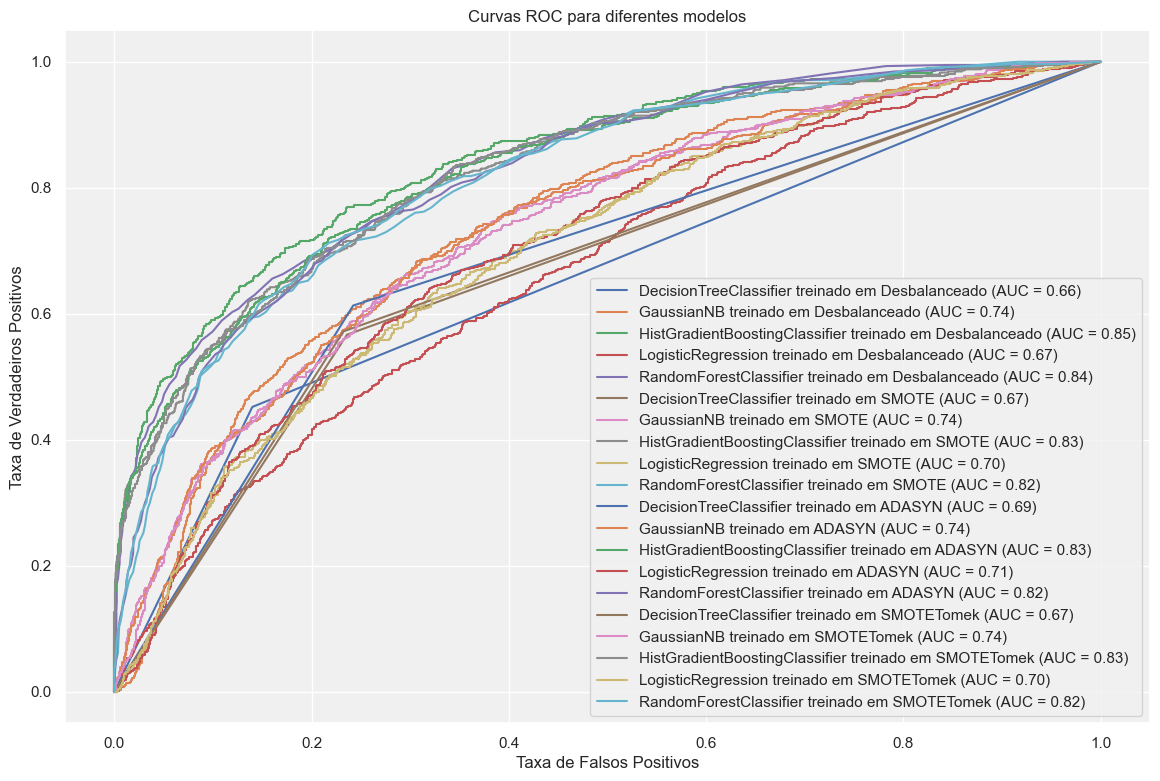

In [27]:
plt.figure(figsize=(14, 9))

for balance_name, X_train_balanced, y_train_balanced in balance_techniques:
    
    n0, n1 = np.bincount(y_train)
    weights = np.where(y_train==1, len(y_train)/(2*n1), len(y_train)/(2*n0))

    for clf in classifiers:
     
        clf.fit(X_train_balanced, y_train_balanced)

        # Calcula as probabilidades de classe
        probs = clf.predict_proba(X_test)[:, 1]

        # Calcula a curva ROC
        fpr, tpr, thresholds = roc_curve(y_test, probs)

        # Calcula a AUC
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'{clf.__class__.__name__} treinado em {balance_name} (AUC = {roc_auc:.2f})')     
        print(f'{clf.__class__.__name__} treinado em {balance_name}: AUC = {roc_auc:.2f}')


plt.legend(loc='lower right')
plt.title('Curvas ROC para diferentes modelos')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.show()

Os valores de AUC para o HistGradientBoostingClassifier treinado nops conjuntos balanceados são geralmente altos, indicando bom desempenho. No entanto, o mesmo modelo treinado no conjunto desbalanceado e RandomForestClassifier, obtiveram auemnto no desempenho em 85% e 84%, respectivamente. Os piores resultados foram dos moelos LogisticRegression e GaussianNB , independente do conjunto treinado. 

Analisando as métricas e os resultados da AUC o modelo mais adequado para o objetivo do projeto é o RandomForestClassifier treinado com a técnica de balanceamento SMOTETomek. 

In [30]:
clf = RandomForestClassifier().fit(X_train_smoteTomek, y_train_smoteTomek)

importances = clf.feature_importances_

feature_names = X_test.columns

# Ordenar as importâncias das variáveis em ordem decrescente
sorted_idx = np.argsort(importances)[::-1]

for i in sorted_idx:
    print(f"{feature_names[i]}: {importances[i]:.3f}")


Age: 0.227
Balance: 0.138
EstimatedSalary: 0.134
CreditScore: 0.124
IsActiveMember: 0.107
NumOfProducts: 0.102
Tenure: 0.075
Gender_Male: 0.070
HasCrCard: 0.023


- **Age (0.227)**: Esta é a variável mais importante de acordo com o modelo. Isso significa que a idade desempenha um papel significativo na previsão do resultado.
- **EstimatedSalary (0.138)** e **Balance (0.135)**: Essas duas variáveis têm importâncias semelhantes e são as próximas mais importantes depois da idade.
- **CreditScore (0.124)**, **NumOfProducts (0.102)** e **IsActiveMember (0.100)**: Essas variáveis têm importâncias um pouco menores, mas ainda assim desempenham um papel significativo na previsão do resultado.
- **Tenure (0.075)** e **Gender_Male (0.073)**: Essas variáveis têm importâncias ainda menores. Isso pode indicar que elas têm menos influência na previsão do resultado em comparação com as outras variáveis.
- **HasCrCard (0.023)**: Esta é a variável menos importante de acordo com o modelo.



# ----------------------------------------------------------------
# Conclusão Geral
# ----------------------------------------------------------------

Considerando a AUC do modelo RandomForestClassifier treinado no SMOTETomek, o resultado é relativamente alto em diferentes conjuntos de dados, o que sugere um bom desempenho geral, assim como a métrica Recall e demais métricas que foram superiores as métricas do modelo HistGradientBoostingClassifier. Ao considerar os objetivos de negócios, neste caso, a previsão de clientes propensos a deixar o banco, as métricas relacionadas as taxas de verdadeiro positivo são priorizadas. Por fim, o modelo **RandomForestClassifier** treinado no **SMOTETomek** atende aos  requisitos e objetivos, sendo uma escolha adequada, mesmo que sua AUC seja ligeiramente menor do que a do modelo HistGradientBoostingClassifier. 

As técnicas de balanceamento melhoraram significadamente as perfomances dos modelos, principalmente estes são baseados em árvore. 

# ----------------------------------------------------------------------
# Possíveis estratégias para diminuição de churn
# ----------------------------------------------------------------------

1. **Enfoque na Idade:**
   - Desenvolver campanhas ou serviços personalizados para diferentes faixas etárias.
   - Oferecer produtos financeiros adaptados às necessidades específicas de diferentes grupos etários.

2. **Engajamento de Membros Ativos:**
   - Implementar programas de recompensas para clientes ativos.
   - Criar iniciativas para manter os clientes envolvidos, como programas de fidelidade ou benefícios exclusivos.

3. **Gestão do Número de Produtos:**
   - Incentivar a adoção de mais produtos financeiros, fornecendo benefícios para clientes com múltiplos produtos.
   - Oferecer pacotes ou descontos para clientes que utilizam uma variedade de serviços.

4. **Atenção à Inatividade do Cliente:**
   - Implementar estratégias proativas para reengajar clientes inativos.
   - Oferecer incentivos especiais para clientes que retomam a atividade após um período de inatividade.

5. **Análise Detalhada do Mercado Alemão:**
   - Realizar uma análise mais aprofundada dos fatores específicos que contribuem para a alta taxa de churn na Alemanha.
   - Adaptar estratégias de retenção com base nas descobertas específicas do mercado alemão.

6. **Abordagem de Gênero Específica:**
   - Desenvolver campanhas de marketing direcionadas a grupos de gênero específicos.
   - Investigar fatores que podem contribuir para a maior taxa de churn entre clientes do sexo feminino e implementar estratégias de mitigação.

7. **Melhora da Experiência do Cliente:**
   - Realizar pesquisas de satisfação do cliente para identificar áreas de melhoria.
   - Implementar mudanças com base no feedback do cliente para aprimorar a experiência geral.

8. **Foco nos Primeiros Meses do Cliente:**
   - Implementar programas de integração eficazes para garantir uma experiência positiva nos primeiros meses do cliente.
   - Oferecer benefícios exclusivos ou descontos para clientes durante o período inicial de relacionamento com o banco.

9. **Avaliação da Experiência com Cartões de Crédito:**
   - Investigar a satisfação dos clientes em relação aos serviços de cartão de crédito.
   - Realizar melhorias nos serviços ou oferecer vantagens adicionais para clientes com cartões de crédito.


# ----------------------------------------------------------------------
# Referências
# ----------------------------------------------------------------------

**Dataset**
1. O conjunto de dados utilizado neste projeto está diponível em: https://www.kaggle.com/datasets/elkamel/churn-modelling/data.

**Livros e artigos**

1. Faceli, K., Lorena, A. C., Gama, J., & Carvalho, A. C. P. de L. F. Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina. Grupo Gen - LTC, 2011. 



2. Mohammed J. Zaki, Wagner Meira, Jr., Data Mining and Machine Learning: Fundamental Concepts and Algorithms, 2nd Edition, Cambridge University Press, March 2020. ISBN: 978-1108473989.  Disponível em: https://dataminingbook.info/



3. James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Springer, 2023. Disponível em: https://www.statlearning.com/.


4. CHAWLA, N. V.; BOWYER, K. W.; HALL, L. O.; KEGELMEYER, W. P. Smote: Synthetic Minority Over-sampling Technique. AI Access Foundation, El Segundo, CA, USA, v. 16, n. 1, p.321–357, 2002. Disponível em: http://doi.org/10.1613/jair.953.


5. HE, H.; BAI, Y.; GARCIA, E. A.; LI, S. Adasyn: Adaptive synthetic sampling approach for imbalanced learning. In: 2008 IEEE International Joint Conference on Neural Networks (IEEE World Congress on Computational Intelligence). [s.n.], 2008. p. 1322–1328. Disponível em: http://doi.org/10.1109/IJCNN.2008.4633969.


6. Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V. and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P. and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E. Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, v. 12, p.2825–2830, 2011. Disponível em: https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html.